In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import networkx as nx
import random

In [2]:
path = '2015/*.csv'
all_files = glob.glob(path)

first_rows = []
for filename in all_files:
    with open(filename, 'r') as f:
        first_row = f.readline().split('\n')[0].split(',')
        agent_name = filename.split("_")[0].split("/")[1] # get the agent name from filename
        first_row.append(agent_name) # append agent name to the first row
    first_rows.append(first_row)

df_merged = pd.DataFrame(first_rows, columns=['Date', 'Value', 'Agent']) # create DataFrame from first rows
df_merged['Date'] = pd.to_datetime(df_merged['Date']) # convert Date column to datetime type
df_merged['Value'] = pd.to_numeric(df_merged['Value']) # convert Value column to numeric type


In [3]:
df_merged

,Date,Value,Agent
0,2015-01-01,3.617587,Apt105
1,2015-01-01,0.342649,Apt85
2,2015-01-01,4.276429,Apt76
3,2015-01-01,3.314261,Apt20
4,2015-01-01,0.006617,Apt43
...,...,...,...
109,2015-01-01,4.330242,Apt69
110,2015-01-01,3.038187,Apt62
111,2015-01-01,2.990677,Apt41
112,2015-01-01,2.069559,Apt18


In [4]:
# create a directed graph
graph = nx.DiGraph()

# add the root node
source = ('seller', 0)
graph.add_node(source)

# add all other nodes and edges
for i, row in df_merged.iterrows():
    agent = row['Agent']
    value = row['Value']
    graph.add_node((agent, value))



In [5]:
# # randomly add edges to the graph with no cycles
# agents = list(graph.nodes())[1:] # exclude the root node from agents
# random.shuffle(agents)
# for agent in agents:
#     targets = list(set(agents) - {agent} - set(graph.successors(agent)))
#     if targets:
#         target = random.choice(targets)
#         graph.add_edge(agent, target)

In [6]:
# # randomly add edges to the graph with no cycles
# agents = list(graph.nodes())[1:] # exclude the root node from agents
# random.shuffle(agents)
# for agent in agents:
#     targets = list(set(agents) - {agent} - set(graph.successors(agent)))
#     if targets:
#         num_edges = len(targets) # select 1 or 2 targets
#         for _ in range(num_edges):
#             target = random.choice(targets)
#             graph.add_edge(agent, target)

# # make sure the root node has indegree 0 and outdegree >= 1
# while graph.out_degree(('seller', 0)) == 0:
#     targets = list(set(agents) - set(graph.successors(('seller', 0))))
# #     target = random.choice(targets)
# #     graph.add_edge(('seller', 0), target)
#     if targets:
#             num_edges = len(targets) # select 1 or 2 targets
#             for _ in range(num_edges):
#                 target = random.choice(targets)
#                 graph.add_edge(('seller', 0), target)


# # remove cycles
# try:
#     topo_order = list(nx.topological_sort(graph))
# except nx.exception.NetworkXUnfeasible:
#     edges = list(graph.edges())
#     random.shuffle(edges)
#     for edge in edges:
#         graph.remove_edge(*edge)
#         try:
#             topo_order = list(nx.topological_sort(graph))
#             break
#         except nx.exception.NetworkXUnfeasible:
#             pass
# # print the graph
# print(graph.edges())

In [7]:
# node_set = set(graph.nodes)
# node_set.remove(('seller', 0))
# print(node_set)
# new_nodes = [('seller', 0)]

# while len(node_set) > 1:
#     new_nodes_n = []
#     for node in new_nodes:
#         if len(node_set) > 1:
#             num_edges = random.randint(1, 5)
#             if len(list(node_set)) < num_edges:
#                 num_edges = len(list(node_set))
#             print(num_edges)
#             targets = random.sample(list(node_set), num_edges)
#             print(targets)
#             for i in range(1,num_edges):
#                 graph.add_edge(node, targets[i])
#                 node_set.remove(targets[i])
#                 new_nodes_n.append(targets[i])
#         else:
#             break
#     new_nodes = new_nodes_n

In [8]:
# import random

# # add random edges
# for node in graph.nodes():
#     # skip the root node
#     if node == ('seller', 0):
#         continue
#     # add a random number of incoming edges
#     num_incoming_edges = random.randint(1, graph.number_of_nodes()-1)
#     # randomly select nodes to connect to
#     possible_nodes = list(graph.nodes())
#     possible_nodes.remove(node)
#     possible_nodes.remove(('seller', 0))
#     if num_incoming_edges > len(list(possible_nodes)):
#         num_incoming_edges = len(list(possible_nodes))
#     incoming_nodes = random.sample(possible_nodes, num_incoming_edges)
#     # add the edges
#     for incoming_node in incoming_nodes:
#         graph.add_edge(incoming_node, node)

        

# # # remove cycles
# try:
#     topo_order = list(nx.topological_sort(graph))
# except nx.exception.NetworkXUnfeasible:
#     edges = list(graph.edges())
#     random.shuffle(edges)
#     for edge in edges:
#         graph.remove_edge(*edge)
#         try:
#             topo_order = list(nx.topological_sort(graph))
#             break
#         except nx.exception.NetworkXUnfeasible:
#             pass
        
# # check if the graph is acyclic
# if not nx.is_directed_acyclic_graph(graph):
#     print("The graph is not acyclic. Try again.")


In [9]:
# add edges to the graph
nodes = list(graph.nodes)[1:]

for i in range(1, 5):
    # choose two random nodes
    node1 = source
    node2 = random.choice(nodes)
    if node2 == source:
        continue

    # add an edge from node1 to node2 if it doesn't already exist
    if node1 != node2 and not graph.has_edge(node1, node2):
        graph.add_edge(node1, node2)


for i in range(1, 1500):
    # choose two random nodes
    node1 = random.choice(nodes)
    node2 = random.choice(nodes)
    if node2 == source:
        continue

    # add an edge from node1 to node2 if it doesn't already exist
    if node1 != node2 and not graph.has_edge(node1, node2):
        graph.add_edge(node1, node2)
        if not nx.is_directed_acyclic_graph(graph):
            graph.remove_edge(node1, node2)
        
# nodes_to_remove = []
# for node in graph.nodes:
#     try:
#         if nx.shortest_path_length(graph, source, node) > 0:
#             continue
#     except:
#         nodes_to_remove.append(node)
    
# graph.remove_nodes_from(nodes_to_remove)
        

In [10]:
nx.is_directed_acyclic_graph(graph)

True

In [11]:
for node in graph.nodes():
    print(f"Successors of node {node}: {list(graph.successors(node))}")

Successors of node ('seller', 0): [('Apt77', 2.458987778), ('Apt49', 2.813372222), ('Apt111', 1.599986667), ('Apt61', 2.791603333)]
Successors of node ('Apt105', 3.617586667): [('Apt44', 2.063098889), ('Apt15', 3.110853333), ('Apt102', 2.82851), ('Apt61', 2.791603333), ('Apt20', 3.314261111), ('Apt33', 1.237714444), ('Apt109', 3.113472222)]
Successors of node ('Apt85', 0.342648889): [('Apt90', 1.517008889), ('Apt67', 0.705446667), ('Apt108', 1.955231111), ('Apt2', 3.375236667), ('Apt10', 1.942324444), ('Apt114', 3.53266), ('Apt51', 8.174294444), ('Apt89', 1.018943333)]
Successors of node ('Apt76', 4.276428889): [('Apt114', 3.53266), ('Apt26', 5.209474444), ('Apt96', 2.959895556), ('Apt19', 5.554032222), ('Apt90', 1.517008889)]
Successors of node ('Apt20', 3.314261111): []
Successors of node ('Apt43', 0.006616667): [('Apt44', 2.063098889)]
Successors of node ('Apt72', 1.771198889): [('Apt87', 0.938086667), ('Apt22', 4.130835556), ('Apt67', 0.705446667), ('Apt101', 0.757168889), ('Apt36'

In [12]:
list(graph.successors(("seller", 0)))

[('Apt77', 2.458987778),
 ('Apt49', 2.813372222),
 ('Apt111', 1.599986667),
 ('Apt61', 2.791603333)]

In [13]:
graph.remove_edges_from(nx.selfloop_edges(graph))

In [14]:
nodes_to_remove = [node for node in graph.nodes() if graph.in_degree(node) == 0]
nodes_to_remove.remove(("seller", 0))
# Remove nodes from the graph
graph.remove_nodes_from(nodes_to_remove)

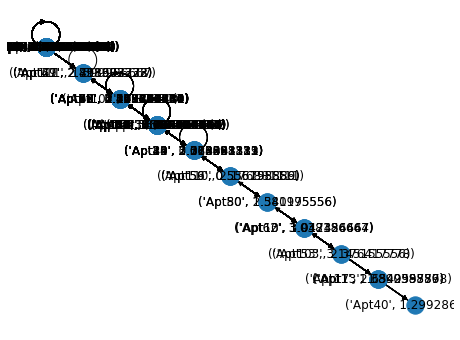

In [15]:
node_levels = {node: 0 for node in graph.nodes()}
for node in graph.nodes():
    if node != ("seller", 0):
        try:
            node_levels[node] = nx.shortest_path_length(graph, ("seller", 0), node)
        except:
            pass

# Define node positions based on their level
node_positions = {node: (node_levels[node], -node_levels[node]) for node in graph.nodes()}

# Draw the graph
fig, ax = plt.subplots(figsize=(8, 6))
nx.draw(graph, pos=node_positions, with_labels=True, ax=ax)

plt.show()

shortest path: 
[('seller', 0), ('Apt49', 2.813372222), ('Apt42', 2.323371111), ('Apt51', 8.174294444)]
----------------------------------
winner payment: 
7.137052222
----------------------------------
seller revenue: 
7.137052222
----------------------------------
agent rewards: 
[(('Apt49', 2.813372222), 0.0), (('Apt42', 2.323371111), 0.0)]
----------------------------------


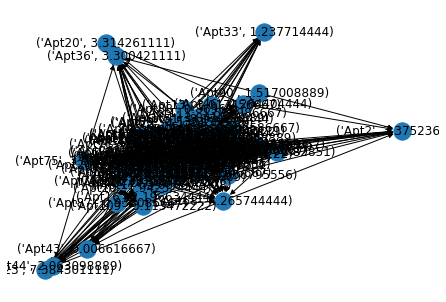

In [16]:
# from file_parser import parse_file
import networkx as nx
import matplotlib.pyplot as plt

# function to find node with max bid, nodes are in the form of ('node_name': str, bid: int)
def find_max_bid(graph, source):
    # find the node with max bid, there can be multiple nodes with same bid
    max_bids = []
    max_bid = 0
    # for node in graph.nodes:
    #     if node[1] > max_bid:
    #         max_bid = node[1]
    #         node_name = node[0]
    # return (node_name, max_bid)
    for node in graph.nodes:
        if node[1] > max_bid:
            max_bid = node[1]
            max_bids = [node]
        elif node[1] == max_bid:
            max_bids.append((node[0], node[1]))
    
    # print(max_bids)
    # find which node is closer to the source
    min_distance = 100000
    min_node = None
    for node in max_bids:
        distance = nx.shortest_path_length(graph, source, node)
        if distance < min_distance:
            min_distance = distance
            min_node = node
    return min_node

def find_max_bid_util(graph):
    # find only the node with max bid
    max_bid = -100000
    for node in graph.nodes:
        if node[1] > max_bid:
            max_bid = node[1]
            node_name = node[0]
    return (node_name, max_bid)

# function to find the path from source to destination
def find_path(graph, source, destination):
    # find the path from source to destination
    paths = nx.all_shortest_paths(graph, source, destination)
    return [path for path in paths]

def create_subgraph(G, node):
    # print("-----------------")
    # print(node)
    # print("-----------------")
    edges = nx.dfs_successors(G, node)
    nodes = []
    for k,v in edges.items():
        nodes.extend([k])
        nodes.extend(v)
    
    # print(nodes)
    return G.subgraph(nodes)


def choose_shortest_path(shortest_paths):
    if len(shortest_paths) == 1:
        return shortest_paths[0]
    # find the first node that does not match in all paths
    num_shortest_paths = len(shortest_paths)
    first_non_match = [shortest_paths[0][0]]*num_shortest_paths

    for i in range(1, len(shortest_paths[0])):
        for j in range(1, num_shortest_paths):
            if shortest_paths[j][i] != shortest_paths[0][i]:
                first_non_match[j] = shortest_paths[j][i]
                first_non_match[0] = shortest_paths[0][i]
                break

    # print("first non matches")
    # print(first_non_match)
    # print("-----------------")
    # array of subgraphs
    subgraphs = []
    for i in range(len(first_non_match)):
        # print("subgraph " + str(i))
        # print("-----------------")
        sub_G = create_subgraph(G, first_non_match[i])
        # print("subgraph nodes")
        # print(sub_G.nodes)
        # print("-----------------")
        # remove the nodes in shortest path and their decendants from the subgraph
        nodes_to_remove = []
        for node in shortest_paths[i][shortest_paths[i].index(first_non_match[i])+1:]:
            # print(node)
            # print("shortest path - ")
            # print(shortest_paths[i])
            # nodes_to_remove.extend(nx.descendants(sub_G, node))
            try:
                decendants = nx.descendants(sub_G, node)
                nodes_to_remove.extend(decendants)
                nodes_to_remove.append(node)
            except:
                pass
            # print("printing nodes to remove" + str(nodes_to_remove))
        sub_G = nx.DiGraph(sub_G)
        # sub_G.remove_nodes_from(nodes_to_remove)
        for node in nodes_to_remove:
            try:
                sub_G.remove_node(node)
            except:
                pass
        # print(sub_G.nodes)
        subgraphs.append(sub_G)
        
    
    for i in range(len(subgraphs)):
        print("subgraph " + str(i))
        print(subgraphs[i].nodes)
        print("-----------------")

    # find the subgraph with max bid
    max_bid = -100000
    max_bid_subgraph = None
    idx  = -1
    for i in range(len(subgraphs)):
        node = find_max_bid_util(subgraphs[i])
        if node[1] > max_bid:
            max_bid = node[1]
            max_bid_subgraph = subgraphs[i]
            idx = i

    # print(max_bid)
    # print the shortest path of the subgraph with max bid
    # print(shortest_paths[idx])

    #destroys the subgraph
    for graph in subgraphs:
        graph.clear()
        del graph
    return shortest_paths[idx]

def payment_of_winner(Graph, source, winner):
    # create a copy of graph, but with winner and its decendants removed
    nodes_to_remove = []
    try:
        decendants = nx.descendants(Graph, winner)
        nodes_to_remove.extend(decendants)
        nodes_to_remove.append(winner)
    except:
        pass
    G = nx.DiGraph(Graph)
    for node in nodes_to_remove:
        try:
            G.remove_node(node)
        except:
            pass
    # print(G.nodes)

    # find max bid of the subgraph
    max_bid = -100000
    max_bid_node = None
    for node in G.nodes:
        if node[1] > max_bid:
            max_bid = node[1]
            max_bid_node = node[0]
    # print(max_bid_node)


    # destroy the graph
    G.clear()
    del G
    return max_bid

def revenue_of_seller(Graph, shortest_path):
    # find the child of source that is a part of the shortest path
    target_node = None
    for node in Graph.successors(shortest_path[0]):
        if node in shortest_path:
            target_node = node
            break
    
    # print(target_node)
    # make a copy of the graph with target node and its decendants removed
    nodes_to_remove = []
    try:
        decendants = nx.descendants(Graph, target_node)
        nodes_to_remove.extend(decendants)
        nodes_to_remove.append(target_node)
    except:
        pass
    G = nx.DiGraph(Graph)
    for node in nodes_to_remove:
        try:
            G.remove_node(node)
        except:
            pass
    # print("printing nodes of G without target node and its decendants")
    # print(G.nodes)

    # find max bid of the subgraph
    max_bid = -100000
    max_bid_node = None
    for node in G.nodes:
        if node[1] > max_bid:
            max_bid = node[1]
            max_bid_node = node[0]
    # print(max_bid_node)

    # destroy the graph
    G.clear()
    del G
    return max_bid


def find_referral_reward(Graph, shortest_path):
    rewards = []
    # for each of nodes between source and target, calculate reward
    
    for i in range(1, len(shortest_path)-1):
        # create a copy of graph, but with agent and its decendants removed
        nodes_to_remove = []
        try:
            decendants = nx.descendants(Graph, shortest_path[i])
            nodes_to_remove.extend(decendants)
            nodes_to_remove.append(shortest_path[i])
        except:
            pass
        G = nx.DiGraph(Graph)
        for node in nodes_to_remove:
            try:
                G.remove_node(node)
            except:
                pass
        # print(G.nodes)
        
        # find max bid of the subgraph
        max_bid = -100000
        max_bid_node = None
        for node in G.nodes:
            if node[1] > max_bid:
                max_bid = node[1]
                max_bid_node = node[0]
        # print(max_bid_node)
        temp1 = max_bid

        # destroy the graph
        G.clear()
        del G

        # make a copy of the graph with i+1 node and its decendants removed
        nodes_to_remove = []
        try:
            decendants = nx.descendants(Graph, shortest_path[i+1])
            nodes_to_remove.extend(decendants)
            nodes_to_remove.append(shortest_path[i+1])
        except:
            pass
        G = nx.DiGraph(Graph)
        for node in nodes_to_remove:
            try:
                G.remove_node(node)
            except:
                pass
        # print(G.nodes)

        # find max bid of the subgraph
        max_bid = -100000
        max_bid_node = None
        for node in G.nodes:
            if node[1] > max_bid:
                max_bid = node[1]
                max_bid_node = node[0]
        # print(max_bid_node)
        temp2 = max_bid

        rewards.append((shortest_path[i], temp1 - temp2))
        # destroy the graph
        G.clear()
        del G
    
    # print(rewards)

    return rewards




# if __name__ == '__main__':
G = graph

source = ("seller", 0)

# find the node with max bid
max_bid = find_max_bid(G, source)
# print(max_bid)
nx.draw(G, with_labels=True)
plt.savefig("filename.png")

# find the path from source to destination
path = find_path(G, source, max_bid)
# print(path)
# path[1][1] = ('B', 2)
shortest_path = choose_shortest_path(path)
print("shortest path: ")
print(shortest_path)
print("----------------------------------")
winner_payment = payment_of_winner(G, shortest_path[0], shortest_path[-1])
print("winner payment: ")
print(winner_payment)
print("----------------------------------")
seller_revenue = revenue_of_seller(G, shortest_path)
print("seller revenue: ")
print(seller_revenue)
print("----------------------------------")

agent_rewards = find_referral_reward(G, shortest_path)
print("agent rewards: ")
print(agent_rewards)
print("----------------------------------")


('Apt51', 8.174294444)
[[('seller', 0), ('Apt77', 2.458987778), ('Apt49', 2.813372222), ('Apt76', 4.276428889), ('Apt19', 5.554032222), ('Apt3', 1.10183), ('Apt5', 3.648683333), ('Apt51', 8.174294444)], [('seller', 0), ('Apt77', 2.458987778), ('Apt49', 2.813372222), ('Apt76', 4.276428889), ('Apt19', 5.554032222), ('Apt3', 1.10183), ('Apt5', 3.648683333), ('Apt105', 3.617586667), ('Apt15', 3.110853333), ('Apt42', 2.323371111), ('Apt51', 8.174294444)], [('seller', 0), ('Apt77', 2.458987778), ('Apt49', 2.813372222), ('Apt76', 4.276428889), ('Apt19', 5.554032222), ('Apt3', 1.10183), ('Apt5', 3.648683333), ('Apt15', 3.110853333), ('Apt42', 2.323371111), ('Apt51', 8.174294444)], [('seller', 0), ('Apt77', 2.458987778), ('Apt49', 2.813372222), ('Apt63', 1.148214444), ('Apt24', 2.718356667), ('Apt105', 3.617586667), ('Apt15', 3.110853333), ('Apt42', 2.323371111), ('Apt51', 8.174294444)], [('seller', 0), ('Apt77', 2.458987778), ('Apt49', 2.813372222), ('Apt63', 1.148214444), ('Apt5', 3.648683333

intermediate_intersection:  [('seller', 0), ('Apt51', 8.174294444)]
A_bar:  [('seller', 0), ('Apt51', 8.174294444)]
[('seller', 0), ('Apt105', 3.617586667), ('Apt76', 4.276428889), ('Apt20', 3.314261111), ('Apt43', 0.006616667), ('Apt30', 3.495585556), ('Apt16', 2.196634444), ('Apt67', 0.705446667), ('Apt50', 1.581175556), ('Apt1', 1.389038889), ('Apt38', 3.108201111), ('Apt113', 1.342997778), ('Apt19', 5.554032222), ('Apt78', 1.273712222), ('Apt64', 2.819513333), ('Apt53', 3.145155556), ('Apt42', 2.323371111), ('Apt40', 1.299286667), ('Apt80', 2.340995556), ('Apt10', 1.942324444), ('Apt83', 2.161851111), ('Apt3', 1.10183), ('Apt75', 3.116165556), ('Apt21', 2.322421111), ('Apt56', 0.556795556), ('Apt13', 3.017456667), ('Apt35', 0.206586667), ('Apt49', 2.813372222), ('Apt26', 5.209474444), ('Apt63', 1.148214444), ('Apt68', 4.265744444), ('Apt89', 1.018943333), ('Apt54', 1.005666667), ('Apt44', 2.063098889), ('Apt24', 2.718356667), ('Apt103', 2.376417778), ('Apt58', 2.428741111), ('Apt33

intermediate_intersection:  [('seller', 0), ('Apt51', 8.174294444)]
A_bar:  [('seller', 0), ('Apt51', 8.174294444)]
[('seller', 0), ('Apt105', 3.617586667), ('Apt76', 4.276428889), ('Apt20', 3.314261111), ('Apt43', 0.006616667), ('Apt30', 3.495585556), ('Apt16', 2.196634444), ('Apt67', 0.705446667), ('Apt50', 1.581175556), ('Apt1', 1.389038889), ('Apt38', 3.108201111), ('Apt113', 1.342997778), ('Apt19', 5.554032222), ('Apt78', 1.273712222), ('Apt64', 2.819513333), ('Apt53', 3.145155556), ('Apt42', 2.323371111), ('Apt40', 1.299286667), ('Apt80', 2.340995556), ('Apt10', 1.942324444), ('Apt83', 2.161851111), ('Apt3', 1.10183), ('Apt75', 3.116165556), ('Apt21', 2.322421111), ('Apt56', 0.556795556), ('Apt13', 3.017456667), ('Apt35', 0.206586667), ('Apt49', 2.813372222), ('Apt26', 5.209474444), ('Apt63', 1.148214444), ('Apt68', 4.265744444), ('Apt89', 1.018943333), ('Apt54', 1.005666667), ('Apt44', 2.063098889), ('Apt24', 2.718356667), ('Apt103', 2.376417778), ('Apt58', 2.428741111), ('Apt33

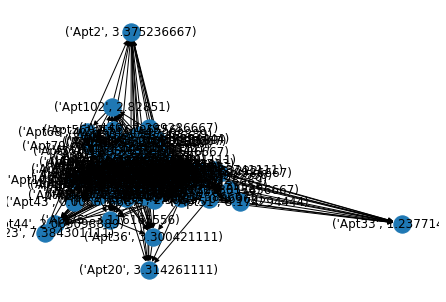

In [17]:
import sys
# import argparse
import networkx as nx
import matplotlib.pyplot as plt
# from file_parser import parseFileGraphCreation

# function to find node with max bid, nodes are in the form of ('node_name': str, bid: int)
def find_max_bid(graph, source):
    # find the node with max bid, there can be multiple nodes with same bid
    max_bids = []
    max_bid = 0
    # for node in graph.nodes:
    #     if node[1] > max_bid:
    #         max_bid = node[1]
    #         node_name = node[0]
    # return (node_name, max_bid)
    for node in graph.nodes:
        if node[1] > max_bid:
            max_bid = node[1]
            max_bids = [node]
        elif node[1] == max_bid:
            max_bids.append((node[0], node[1]))
    
    # print(max_bids)
    # find which node is closer to the source
    min_distance = 100000
    min_node = None
    for node in max_bids:
        distance = nx.shortest_path_length(graph, source, node)
        if distance < min_distance:
            min_distance = distance
            min_node = node
    return min_node

def find_max_bid_without_node(graph, source, node_to_remove):
    # find the node with max bid, there can be multiple nodes with same bid
    G_temp = graph.copy()
    # remove node_to_remove and all nodes such that, if node_to_remove is removed, then the node is not connected to the source
    if type(node_to_remove) == list:
        for node in node_to_remove:
            G_temp.remove_node(node)
    else:
        G_temp.remove_node(node_to_remove)
    for node in graph.nodes:
        try:
            if not nx.has_path(G_temp, source, node):
                G_temp.remove_node(node)
        except:
            pass
    print(G_temp.nodes)
    max_bids = []
    max_bid = 0
    for node in G_temp.nodes:
        if node[1] > max_bid:
            max_bid = node[1]
            max_bids = [node]
        elif node[1] == max_bid:
            max_bids.append((node[0], node[1]))
        
    # print(max_bids)
    # find which node is closer to the source
    min_distance = 100000
    min_node = None
    for node in max_bids:
        distance = nx.shortest_path_length(G_temp, source, node)
        if distance < min_distance:
            min_distance = distance
            min_node = node
    
    G_temp.clear()
    del G_temp
    return min_node


def find_all_paths(graph, source, target):
    all_paths = list(nx.all_simple_paths(graph, source, target))
    return all_paths


def find_intersection(graph, source, all_paths):
    # find the intersection of all paths
    intersection = set(all_paths[0])
    for path in all_paths:
        intersection = intersection.intersection(set(path))
    
    # sort intersection by depth
    intersection = list(intersection)
    intersection.sort(key=lambda x: nx.shortest_path_length(graph, source, x))
    return intersection


def find_sibling_set(graph, intersection, source, target):
    # find the sibling set
    sibling_set = {}
    for i in range(1, len(intersection)):
        siblings = []
        # find the depth of the node
        depth = nx.shortest_path_length(graph, source, intersection[i-1])
        # find neighbors of the node
        neighbors = list(graph.neighbors(intersection[i-1]))
        # check if all the neighbors have depth + 1, else discard
        for neighbor in neighbors:
            if nx.shortest_path_length(graph, source, neighbor) == depth + 1:
                siblings.append(neighbor)
        try:
            siblings.remove(intersection[i])
        except:
            pass
        sibling_set[intersection[i]] = siblings
    return sibling_set


def calculate_nodes_in_subgraph(graph, node, source, target):
    # print("node: ", node)
    G_temp = graph.copy()
    G_temp.remove_node(node) 
    count = 1   
    for node in graph.nodes:
        try:
            if not nx.has_path(G_temp, source, node):
                G_temp.remove_node(node)
                count += 1
        except:
            pass
    G_temp.clear()
    del G_temp
    return count



def calculate(graph, common_nodes, sibling_set, source, target):
    length = len(common_nodes)
    A = common_nodes
    # print(A)
    # Pi = [0] * length
    # R = [0] * length
    # p = [0] * length
    Pi = {}
    R = {}
    p = {}

    # P_auc = [0] * length
    # P_auc[0] = 0
    P_auc = {}
    P_auc[common_nodes[0]] = 0
    S_theta = 0

    for j in range(1, length):
        print("node removed: ", A[j])
        P_auc[A[j]] = find_max_bid_without_node(graph, A[0], A[j])[1]
        print(P_auc[A[j]])
        S_aj = P_auc[A[j]] - P_auc[A[j-1]]
        print("S_aj: ", S_aj)
        X = sibling_set[A[j]].copy()
        siblings = X.copy()
        X.append(A[j])
        print("X: ", X)
        # print(calculate_nodes_in_subgraph(graph, A[j], source, target))
        n_X = 0
        for x in X:
            n_X += calculate_nodes_in_subgraph(graph, x, source, target)
        print("n_X: ", n_X)

        for k in range(len(X)):
            h_bar = find_max_bid_without_node(graph, source, X[k])
            print("h_bar: ", h_bar)
            intermediate_intersection = find_intersection(graph, source, find_all_paths(graph, source, h_bar))
            print("intermediate_intersection: ", intermediate_intersection)
            A_bar = intermediate_intersection
            print("A_bar: ", A_bar)
            try:
                if A[j-1] == A_bar[j-1]:
                    t = find_max_bid_without_node(graph, source, [A_bar[j],X[k]])[1]
                    S_k = t - P_auc[A[j-1]]
                else:
                    S_k = 0
            except:
                S_k = 0
            print("S_k: ", S_k)
            print("length", length)
            print("length of X", len(X))
            R[X[k]] = calculate_nodes_in_subgraph(graph, X[k], source, target) / n_X * S_k
            print("R[k]: ", R[X[k]])
            p[X[k]] = -1 * R[X[k]]
        
        temp_sum = 0
        for i in range(len(X)):
            temp_sum += R[X[i]]
        S_theta += S_aj - temp_sum

        if A[j][1] >= P_auc[A[j]]:
            Pi[A[j]] = 1
            p[A[j]] = P_auc[A[j]] - R[A[j]]
            break

    
    print("Pi: ", Pi)
    # print("R: ", R)
    print("p: ", p)





# if __name__ == '__main__':

G = graph
# source = ('\0', -1)
# [G,source] = parseFileGraphCreation(input_file)
source = list(graph.nodes)[0]

nx.draw(G, with_labels=True)
plt.savefig("filename.png")

max_node = find_max_bid(G, source)
winner = max_node
print(max_node)

all_paths = find_all_paths(G, source, max_node)
print(all_paths)

common_nodes = find_intersection(G, source,all_paths)
print(common_nodes)

sibling_set = find_sibling_set(G, common_nodes, source, winner)
print(sibling_set)

calculate(G, common_nodes, sibling_set, source, winner)

In [18]:
nx.shortest_path_length(graph, source, ('Apt51', 8.174294444))

3

In [19]:
graph.in_degree(('Apt51', 8.174294444))

18